In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
flat_data = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(229,229))
    images.append(image_resized)
    flat_data.append(image_resized.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3,random_state=109)

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [17]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
  
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred_gini = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred_gini)

Predicted values:
[2 3 3 0 3 0 0 1 3 1 3 3 3 3 0 2 3 2 2 2 2 0 0 3 2 2 1 2 0 2 2 2 0 2 2 3 0
 0 1 1 1 2 2 1 3 3 2 2]


In [14]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini))
      
print("Accuracy : ",accuracy_score(y_test,y_pred_gini)*100)
      
print("Report : ",classification_report(y_test, y_pred_gini))

Confusion Matrix:  [[9 0 1 2]
 [0 5 3 2]
 [1 2 6 3]
 [0 0 8 6]]
Accuracy :  54.166666666666664
Report :                precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.71      0.50      0.59        10
           2       0.33      0.50      0.40        12
           3       0.46      0.43      0.44        14

    accuracy                           0.54        48
   macro avg       0.60      0.54      0.56        48
weighted avg       0.59      0.54      0.56        48



In [18]:
y_pred_entro = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred_entro)

Predicted values:
[3 3 3 0 3 0 0 1 2 1 2 3 3 2 0 2 3 2 2 2 3 0 0 2 2 2 1 2 0 2 3 1 0 3 3 3 0
 0 1 1 1 1 2 1 2 2 1 3]


In [19]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_entro))
      
print("Accuracy : ",accuracy_score(y_test,y_pred_entro)*100)
      
print("Report : ",classification_report(y_test, y_pred_entro))

Confusion Matrix:  [[9 0 2 1]
 [0 6 3 1]
 [1 2 6 3]
 [0 2 4 8]]
Accuracy :  60.416666666666664
Report :                precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.60      0.60      0.60        10
           2       0.40      0.50      0.44        12
           3       0.62      0.57      0.59        14

    accuracy                           0.60        48
   macro avg       0.63      0.61      0.61        48
weighted avg       0.63      0.60      0.61        48



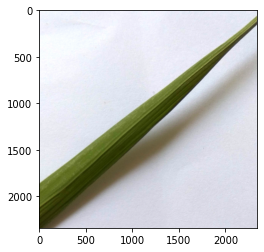

Predicted Disease is Healthy


In [26]:
import matplotlib.pyplot as plt
imagetest=skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy/IMG_20190424_130226.jpg')
flattenimg=[]
img_resized = resize(imagetest,(229,229), anti_aliasing=True, mode='reflect')
flattenimg.append(img_resized.flatten())
%matplotlib inline
plt.imshow(imagetest)
plt.show()
k = target_names
p = clf_gini.predict(flattenimg)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])